## Yêu cầu: Thực hiện linenear regression để từ Poverty Level => dự đoán Teen Birth Rate
1. Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần. Trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột PovPct (inputs) và Brth15to17 (outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu PovPct là 16 => Brth15to17 là bao nhiêu?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../Data/poverty.txt", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [3]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


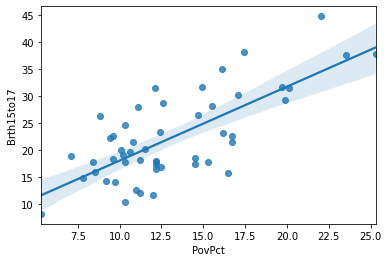

In [4]:
sns.regplot(data=data, x='PovPct', y='Brth15to17')
plt.show()

In [5]:
inputs = data[['PovPct']]
inputs.head()

,PovPct
0,20.1
1,7.1
2,16.1
3,14.9
4,16.7


In [6]:
outputs = data[['Brth15to17']]
outputs.head()

,Brth15to17
0,31.5
1,18.9
2,35.0
3,31.6
4,22.6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.20)
regr1 = LinearRegression()
regr1 = regr1.fit(X_train, y_train)

In [8]:
y_pred = regr1.predict(X_test)

In [9]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,17.7,20.442478
1,19.0,17.795360
2,31.5,30.898592
3,30.1,26.927915
4,38.2,27.324983


In [10]:
# The coefficients
m=regr1.coef_[0]
b=regr1.intercept_
print('Coefficients: \n', m)
print('Interceft: \n', b)

Coefficients: 
 [1.32355875]
Interceft: 
 [4.29506082]


In [11]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(outputs, regr1.predict(inputs)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr1.score(inputs, outputs))

Mean squared error: 30.04
Variance score: 0.53


#### Score = 53% => mô hình phù hợp ~ 53% dữ liệu => chưa là một mô hình phù hợp

In [12]:
# Check the score of train and test
regr1.score(X_train, y_train)

0.517544778951259

In [13]:
regr1.score(X_test, y_test)

0.46231514732467394

#### Both Score of Training & score of Testing are low => Under fitting

In [14]:
reg_line = [(m* float(x)) + b for x in np.array(inputs)]

In [15]:
x_now = [[16]]
y_now = regr1.predict(x_now)
print(y_now)

[[25.4720008]]


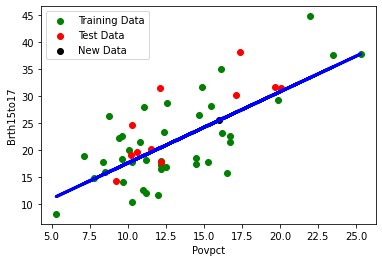

In [16]:
# Plot outputs
plt.scatter(X_train, y_train, color='green', label="Training Data")
plt.scatter(X_test, y_test, color='red', label= "Test Data")
plt.scatter(x_now, y_now, color='black', label= "New Data")
plt.plot(inputs,reg_line, color="blue", linewidth=3)
plt.xlabel("Povpct")
plt.ylabel("Brth15to17")
plt.legend()
plt.show()

## Có giải pháp nào tốt hơn không???

### Polynomial

In [17]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(inputs['PovPct'], outputs['Brth15to17'], 3) # bac 3
p = np.poly1d(f)
p

poly1d([-4.50252043e-04,  5.18694078e-02,  1.46589658e-01,  1.18676987e+01])

In [18]:
f

array([-4.50252043e-04,  5.18694078e-02,  1.46589658e-01,  1.18676987e+01])

In [19]:
# Find R^2
r_squared = r2_score(outputs, p(inputs))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5416081543854672


In [20]:
# Find MSE
print('The mean square error using Polinormial Fit: ', mean_squared_error(outputs['Brth15to17'], p(inputs['PovPct'])))

The mean square error using Polinormial Fit:  29.075472254035894


In [21]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 45, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for outputs ~ inputs')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Outputs')
    plt.show()
    plt.close()

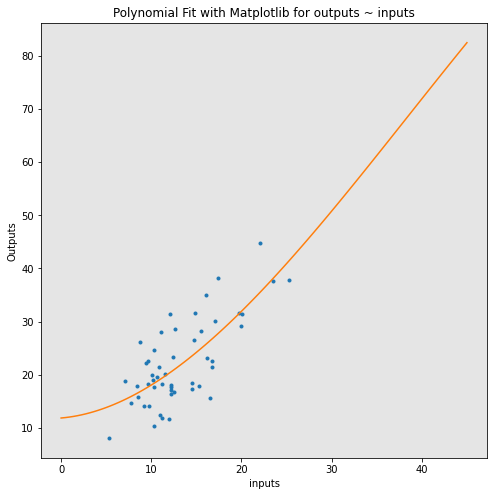

In [22]:
plt.figure(figsize=(8,8))
PlotPolly(p, inputs['PovPct'], outputs['Brth15to17'], 'inputs')